In [1]:
import numpy as np
from Ridge import Ridge_parameters
from prepare_data import prepare_data
from polynomial_features import polynomial_features
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

# Styling function
from Set_latex_params import set_mpl_latex_style
set_mpl_latex_style()

x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data()

## Testing our Ridge parameters function

In [2]:
pol = 5
X_train = polynomial_features(x_train,pol, False)
X_test = polynomial_features(x_test, pol, False)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

beta_Ridge = Ridge_parameters(X_train_s,y_train,1)
ridge = make_pipeline(StandardScaler(), Ridge(alpha=1.0))  
ridge.fit(X_train, y_train)
ridge_step = ridge.named_steps["ridge"]

print(f"Our selfmade Ridge function has the parameters: {beta_Ridge}")
print(f"The imported Ridge function has the parameters: {ridge_step.coef_}")

Our selfmade Ridge function has the parameters: [-0.03040265 -0.55497492  0.0334894   0.36136476 -0.00513492]
The imported Ridge function has the parameters: [-0.03040265 -0.55497492  0.0334894   0.36136476 -0.00513492]


We can see that we get the same parameters

## Computing MSE and R2-score for different polynomial degrees and lambda values

In [3]:
pol = 15
# lambdas = np.concatenate((np.logspace(1,-5,14),np.array([0])))
lambdas = [0,1e-5,1e-4,1e-3,1e-2,1e-1,1,10]

mse_r2_scores = np.zeros((15,8))

pol_degrees = np.arange(1,pol+1,dtype=int)


for pol in pol_degrees:    
    X_train = polynomial_features(x_train,pol, False)
    X_test = polynomial_features(x_test, pol, False)

    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    y_offset = np.mean(y_train)

    for i,lam in enumerate(lambdas):
        beta_Ridge = Ridge_parameters(X_train_s,y_train,lambda_=lam)
        y_test_fit = X_test_s@beta_Ridge
        mse_r2_scores[pol-1,i] = mse(y_test,y_test_fit+y_offset)

df = pd.DataFrame(mse_r2_scores)
df.index = pol_degrees
df.columns = lambdas
df = df.rename_axis("Pol deg", axis=0).rename_axis("Lambda", axis=1)
df

# print(np.argmin(df))


Lambda,0.00000,0.00001,0.00010,0.00100,0.01000,0.10000,1.00000,10.00000
Pol deg,,,,,,,,
1,0.075721,0.075721,0.075721,0.075721,0.075721,0.075717,0.075676,0.075315
2,0.043860,0.043860,0.043860,0.043860,0.043855,0.043805,0.043322,0.039817
3,0.046324,0.046324,0.046323,0.046322,0.046311,0.046203,0.045227,0.040156
4,0.022971,0.022971,0.022969,0.022957,0.022837,0.021738,0.017231,0.032731
5,0.023331,0.023331,0.023330,0.023315,0.023173,0.021916,0.017200,0.033077
6,0.014552,0.014549,0.014525,0.014289,0.012296,0.008252,0.019702,0.027211
7,0.014229,0.014226,0.014204,0.013984,0.012109,0.008285,0.019669,0.027343
8,0.010641,0.010574,0.009999,0.006150,0.006508,0.011765,0.016286,0.026630
9,0.011215,0.011140,0.010501,0.006379,0.006468,0.011703,0.016278,0.026673


## Extracting optimal degree and regularization (minimal MSE)

In [4]:
min_val = df.min().min()  # lowest MSE score
min_col = df.min().idxmin()  # lambda with lowest MSE
min_row = df[min_col].idxmin()  # polynomial degree with lowest MSE

print(f"Smallest MSE: {min_val:.5f}")
print(f"Best polynomial degree: {min_row}")
print(f"Best lambda: {min_col}")

Smallest MSE: 0.00185
Best polynomial degree: 13
Best lambda: 1e-05


## Plotting the model with the minimal MSE:


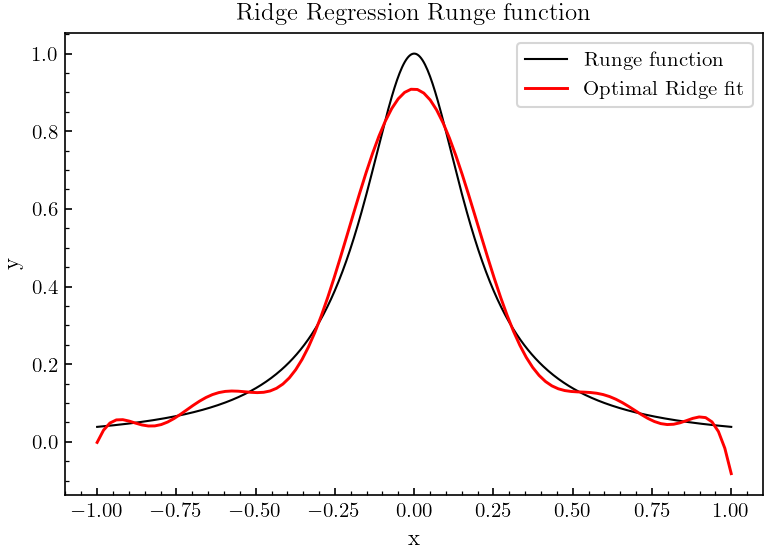

The R2-score for the optimal Ridge parameters is: 0.9729973678684349


In [5]:
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data()
pol=13
lam=1e-5

X_train = polynomial_features(x_train,pol, False)
X_test = polynomial_features(x_test, pol, False)
X_plot = polynomial_features(x, pol, False)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)
y_offset = np.mean(y_train)

beta = Ridge_parameters(X_train_s, y_train, lambda_=lam)
y_fit = X_plot_s@beta + y_offset

x_dense = np.linspace(-1, 1, 500)
y_runge = 1 / (1 + 25 * x_dense**2)
plt.plot(x_dense, y_runge, color="black", linewidth=1, label="Runge function")
plt.plot(x, y_fit, color="red",label="Optimal Ridge fit")
plt.title("Ridge Regression Runge function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig("Plots/optimal_ridge_fit.pdf", bbox_inches="tight")
plt.show()

## Also compute R2-score for this fit:
y_test_fit = X_test_s@beta + y_offset
R2_optimal = (r2_score(y_test, y_test_fit))
print(f"The R2-score for the optimal Ridge parameters is: {R2_optimal}")

In [6]:
latex_code = df.to_latex(index=False)

with open("table.tex", "w") as f:
    f.write(latex_code)

## Plotting MSE for ridge with degree = 8 (optimal OLS complexity)

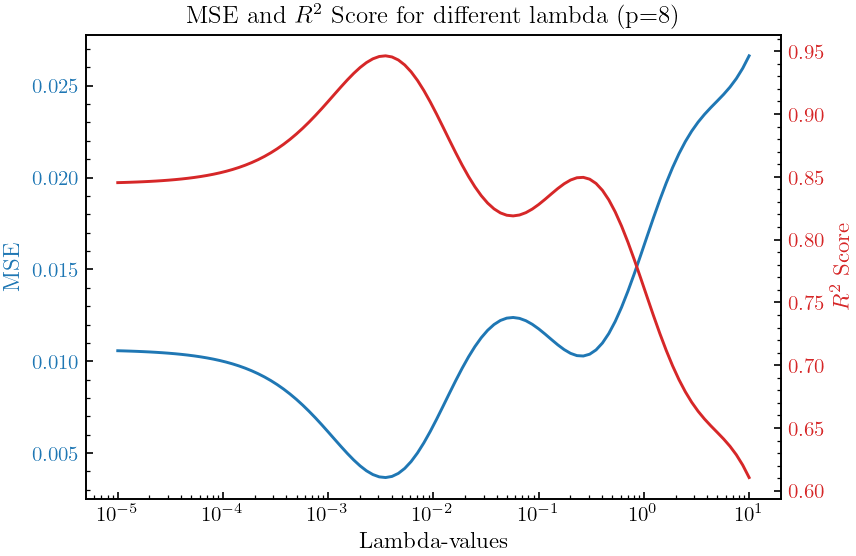

In [7]:
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data()
lambdas = np.logspace(1,-5,100)
n = len(lambdas)
pol = 8

mse_scores = np.zeros(n)
r2_scores = np.zeros(n)

for i,lam in enumerate(lambdas):
    X_train = polynomial_features(x_train,pol, False)
    X_test = polynomial_features(x_test, pol, False)

    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    y_offset = np.mean(y_train)

    beta_Ridge = Ridge_parameters(X_train_s,y_train,lam)
    y_test_fit = X_test_s@beta_Ridge+y_offset
    mse_scores[i] = mse(y_test,y_test_fit)
    r2_scores[i] = r2_score(y_test,y_test_fit)

fig, ax1 = plt.subplots()

# Plot MSE on the first y-axis (left)
ax1.plot(lambdas, mse_scores, color='tab:blue', label='MSE')
ax1.set_xscale('log')
ax1.set_xlabel('Lambda-values')
ax1.set_ylabel('MSE', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(lambdas, r2_scores, color='tab:red', label='R2 Score')
ax2.set_ylabel('$R^2$ Score', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and layout
plt.title(f'MSE and $R^2$ Score for different lambda (p={pol})')
fig.tight_layout()
plt.savefig("Plots/Ridge_MSE_and_R2deg8.pdf", bbox_inches="tight")
plt.show()

## Plotting MSE for ridge with optimal Ridge complexity (poly_degree = 13)

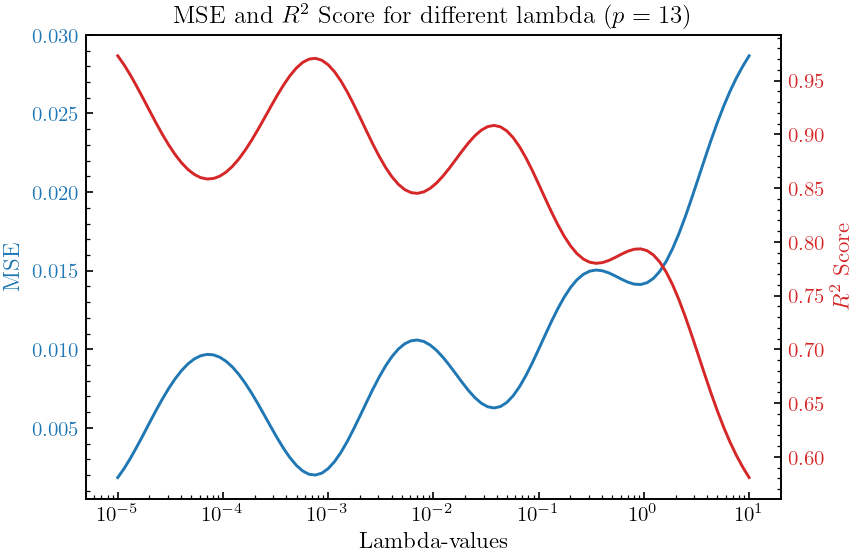

In [8]:
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data()
lambdas = np.logspace(1,-5,100)
n = len(lambdas)
pol = 13
mse_scores = np.zeros(n)
r2_scores = np.zeros(n)

for i,lam in enumerate(lambdas):
    X_train = polynomial_features(x_train,pol, False)
    X_test = polynomial_features(x_test, pol, False)

    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    y_offset = np.mean(y_train)

    beta_Ridge = Ridge_parameters(X_train_s,y_train,lam)
    y_test_fit = X_test_s@beta_Ridge+y_offset
    mse_scores[i] = mse(y_test,y_test_fit)
    r2_scores[i] = r2_score(y_test,y_test_fit)

fig, ax1 = plt.subplots()

# Plot MSE on the first y-axis (left)
ax1.plot(lambdas, mse_scores, color='tab:blue', label='MSE')
ax1.set_xscale('log')
ax1.set_xlabel('Lambda-values')
ax1.set_ylabel('MSE', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(lambdas, r2_scores, color='tab:red', label='R2 Score')
ax2.set_ylabel('$R^2$ Score', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and layout
plt.title(f'MSE and $R^2$ Score for different lambda $(p={pol})$')
fig.tight_layout()
plt.savefig("Plots/Ridge_MSE_and_R2deg13.pdf", bbox_inches="tight")
plt.show()

## Plotting parameters with increasing regularization

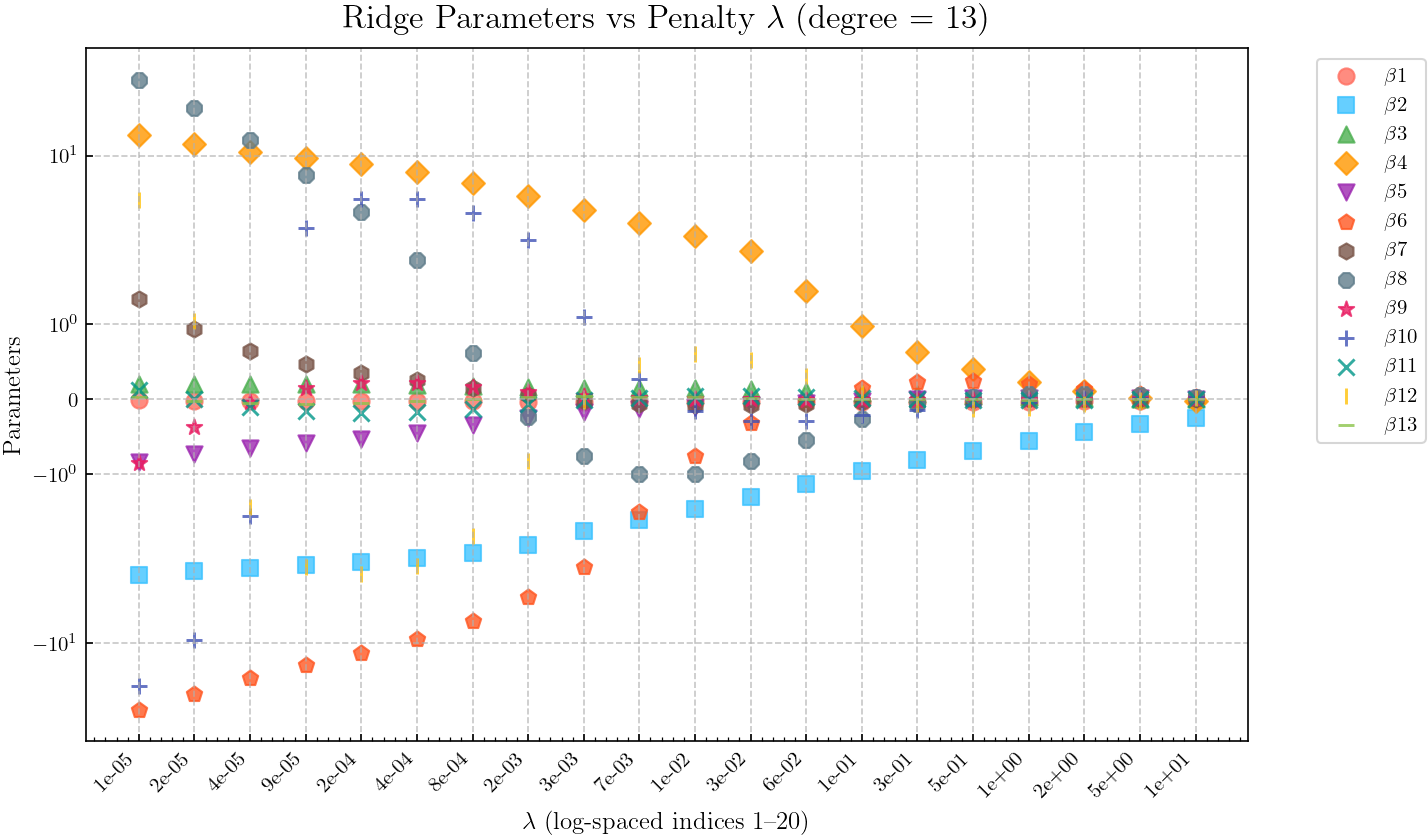

In [9]:
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data()
degree = 13
X_train = polynomial_features(x_train,degree, False)
X_test = polynomial_features(x_test, degree, False)
X_plot = polynomial_features(x, degree, False)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)
y_offset = np.mean(y_train)                             

# Make lambda array and empty array to store parameters
lambdas = np.logspace(-5, 1, 20)
parameters = np.zeros((len(lambdas), degree))

# Compute parameters and store in array 
for i, lam in enumerate(lambdas):
    beta = Ridge_parameters(X_train_s, y_train, lambda_=lam) 
    parameters[i, :] = beta

# Plot
plt.figure()
markers = ['o', 's', '^', 'D', 'v', 'p', 'h', '8', '*', '+', 'x', '|', '_', '1', '2', '3', '4', '<', '>', 'H', 'X', 'P', 'D', 'o', 's']
colors  = ['#FF6F61', '#40C4FF', '#4CAF50', '#FF9800', '#9C27B0', '#FF5722', '#795548', '#607D8B', '#E91E63', '#3F51B5', '#009688', '#FFC107', '#8BC34A', '#FF9800', '#F44336', '#2196F3', '#4CAF50', '#FF9800', '#9C27B0', '#FF5722', '#795548', '#607D8B', '#E91E63', '#3F51B5', '#009688']

plot_indices = list(range(1, len(lambdas) + 1))

legend_added = set()

for idx, x_pos in enumerate(plot_indices):
    lam_params = parameters[idx, :degree]        
    degree_x   = np.full(degree, x_pos)           
    degree_y   = lam_params

    for j in range(degree):
        label = rf'$\beta${j+1}' if j not in legend_added else ""
        if label:
            legend_added.add(j)

        plt.scatter(degree_x[j], degree_y[j],
                    marker=markers[j % len(markers)],
                    color=colors[j % len(colors)],
                    s=60, alpha=0.8, label=label)

# Titles, labels, scales, grid, legend placement, and sizing 
plt.title(rf"Ridge Parameters vs Penalty $\lambda$ (degree = {degree})", fontsize=16, fontfamily='sans-serif', pad=10)
plt.xlabel("$\lambda$ (log-spaced indices 1–20)", fontsize=12, fontfamily='sans-serif')
plt.ylabel("Parameters", fontsize=12, fontfamily='sans-serif')
plt.yscale('symlog')

# Set x-ticks to 1..20
plt.xticks(plot_indices, [f"{lam:.0e}" for lam in lambdas], rotation=45, ha="right")

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.savefig("Plots/ridge_parameters_by_lambda_deg10.pdf", bbox_inches="tight")
plt.show()
